In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import obspy.geodetics.flinnengdahl as flinnengdahl
import pandas as pd

In [2]:
def myround(x, base=5):
    return base * round(x/base)

In [3]:
fe = flinnengdahl.FlinnEngdahl()

In [4]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [5]:
def get_stf(scardec_name, wanted_type = 'fctopt'):
    db = combined[combined['scardec_name']==scardec_name]

    time = []
    momentrate = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        time.append(float(split[0]))
        momentrate.append(float(split[1]))

    momentrate = np.array(momentrate)
    return momentrate, time, db

In [6]:
def get_mag(scardec_name):
    db = combined[combined['scardec_name']==scardec_name]
    mag = db['scardec_magnitude'].values[0]
    return mag

def get_date(scardec_name):
    db = combined[combined['scardec_name']==scardec_name]
    year = db['year'].values[0]
    month = db['month'].values[0]
    day = db['day'].values[0]
    return year, month, day

In [7]:
def get_strike_dip_rake(scardec_name, wanted_type = 'fctopt'):
    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith(wanted_type)]
    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    line = lines[1]

    split = line.split(' ')
    split = [s for s in split if s not in ['', ' ', '\n']]

    strike1 = float(split[3])
    dip1 = float(split[4])
    rake1 = float(split[5])

    strike2 = float(split[6])
    dip2 = float(split[7])
    rake2 = float(split[8])

    return strike1, dip1, rake1, strike2, dip2, rake2

In [ ]:
def convert_fe_subdivisions_to_regions(subdivision):
    final_values = [17, 29, 46, 52, 71, 83, 101, 142, 146, 157, 168, 179, 182, 189,
                    195, 208, 210, 216, 230, 241, 247, 260, 272, 293, 301, 319, 325,
                    334, 356, 375, 401, 414, 437, 527, 531, 549, 587, 610, 632, 655,
                    666, 682, 692, 699, 702, 708, 712, 720, 726, 729]

    if subdivision < 730:
        for index, max_value in enumerate(final_values):
            if subdivision <= max_value:
                return index+1
    else:
        if subdivision == 730:
            return 5
        elif subdivision == 731:
            return 7
        elif subdivision == 732:
            return 10
        elif subdivision in [733, 734, 735, 736, 737]:
            return 25
        elif subdivision in [738, 739]:
            return 32
        elif subdivision in [740, 741, 742]:
            return 33
        elif subdivision in [743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755]:
            return 37
        elif subdivision == 756:
            return 43
        elif subdivision == 757:
            return 44
        else:
            return None


In [23]:
results_db = pd.DataFrame(columns = ['scardec_name', 'magnitude', 'year', 'month', 'day', 'latitude', 'longitude', 'depth', 'strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2', 'FE', 'region'])

for scardec_name in os.listdir('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec'):
    #print(scardec_name)
    db = combined[combined['scardec_name']==scardec_name]

    fe_region = fe.get_number(db['longitude'].values[0], db['latitude'].values[0])

    region = convert_fe_subdivisions_to_regions(fe_region)
    list_for_database = [scardec_name, get_mag(scardec_name), *get_date(scardec_name), db['latitude'].values[0], db['longitude'].values[0], db['depth'].values[0], *get_strike_dip_rake(scardec_name), fe_region, region]
    results_db.loc[len(results_db)] = list_for_database


In [24]:
results_db

,scardec_name,magnitude,year,month,day,latitude,longitude,depth,strike1,dip1,rake1,strike2,dip2,rake2,FE,region
0,FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND,6.591,2017,8,18,-1.112,-13.660,17.0,348.0,83.0,8.0,257.0,82.0,173.0,407,32
1,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,6.128,2011,1,26,2.200,96.830,25.0,327.0,14.0,104.0,132.0,77.0,87.0,706,46
2,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,5.927,1998,10,10,-0.384,119.859,17.0,3.0,23.0,49.0,227.0,73.0,106.0,265,23
3,FCTs_19920730_082446_XIZANG,6.017,1992,7,30,29.580,90.160,13.0,22.0,41.0,-72.0,179.0,52.0,-105.0,306,26
4,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,6.157,1996,3,27,11.777,-87.935,8.0,127.0,43.0,-99.0,319.0,48.0,-81.0,74,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,FCTs_20030725_221329_NEAR_EAST_COAST_OF_HONSHU...,6.039,2003,7,25,38.420,141.000,6.0,192.0,42.0,111.0,345.0,51.0,72.0,228,19
4085,FCTs_20080429_052604_HOKKAIDO__JAPAN_REGION,5.760,2008,4,29,41.452,142.030,49.0,184.0,28.0,73.0,23.0,64.0,99.0,224,19
4086,FCTs_20210927_061721_CRETE__GREECE,5.904,2021,9,27,35.244,25.270,7.0,32.0,37.0,-103.0,228.0,54.0,-80.0,370,30
4087,FCTs_20160105_022111_SOUTHEAST_OF_SHIKOKU__JAPAN,5.954,2016,1,5,30.613,132.734,6.0,47.0,52.0,-31.0,157.0,66.0,-138.0,237,20


(array([201.,  33.,  34.,  15.,  98.,  80.,  32., 317.,   5.,  85.,  35.,
        264., 113., 289., 303., 161.,  34., 126., 367.,  56.,  82., 159.,
        160., 263.,  25.,  50.,  23.,  15.,  57.,  57.,  19., 104.,  95.,
          5.,   0.,   2.,  21.,   4.,   9.,  23.,  38.,  13.,  23.,   2.,
          6., 118.,  12.,  56.,   0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 49 artists>)

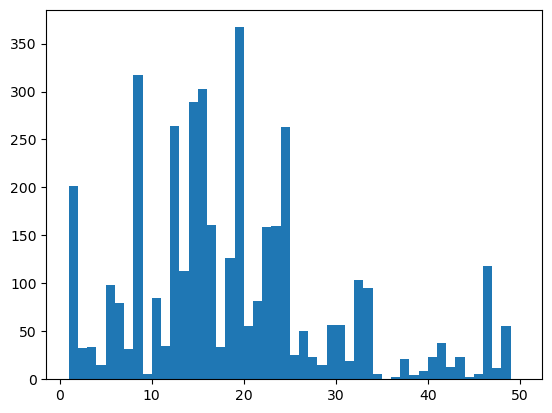

In [28]:
plt.hist(results_db['region'], np.arange(1, 51, 1))

In [30]:
results_db[results_db['region'].isin([1,2,4,5,6,8,9,17,19,20,21,22,46,24,16,15,23])]

,scardec_name,magnitude,year,month,day,latitude,longitude,depth,strike1,dip1,rake1,strike2,dip2,rake2,FE,region
1,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,6.128,2011,1,26,2.200,96.830,25.0,327.0,14.0,104.0,132.0,77.0,87.0,706,46
2,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,5.927,1998,10,10,-0.384,119.859,17.0,3.0,23.0,49.0,227.0,73.0,106.0,265,23
4,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,6.157,1996,3,27,11.777,-87.935,8.0,127.0,43.0,-99.0,319.0,48.0,-81.0,74,6
5,FCTs_20011012_150216_SOUTH_OF_MARIANA_ISLANDS,6.935,2001,10,12,12.690,144.980,37.0,149.0,30.0,53.0,10.0,67.0,109.0,210,17
6,FCTs_19960212_090807_SOUTH_OF_SUMBAWA__INDONESIA,6.193,1996,2,12,-11.040,118.670,7.0,69.0,39.0,-100.0,261.0,52.0,-82.0,291,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,FCTs_19950814_043717_NEW_BRITAIN_REGION__P.N.G,6.775,1995,8,14,-4.840,151.510,135.0,249.0,25.0,123.0,33.0,70.0,76.0,192,15
4083,FCTs_20080423_182841_TAIWAN_REGION,6.095,2008,4,23,22.881,121.619,20.0,249.0,72.0,-166.0,155.0,77.0,-18.0,243,21
4084,FCTs_20030725_221329_NEAR_EAST_COAST_OF_HONSHU...,6.039,2003,7,25,38.420,141.000,6.0,192.0,42.0,111.0,345.0,51.0,72.0,228,19
4085,FCTs_20080429_052604_HOKKAIDO__JAPAN_REGION,5.760,2008,4,29,41.452,142.030,49.0,184.0,28.0,73.0,23.0,64.0,99.0,224,19


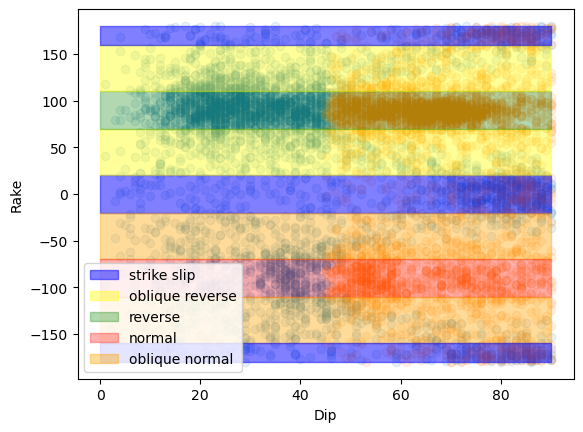

In [36]:
plt.scatter(results_db['dip1'], results_db['rake1'], alpha = 0.1)
plt.scatter(results_db['dip2'], results_db['rake2'], alpha = 0.1)

plt.ylabel('Rake')
plt.xlabel('Dip')

plt.fill_betweenx([-20, 20], 0, 90, color = 'blue', alpha = 0.5, label = 'strike slip')
plt.fill_betweenx([20, 70], 0, 90, color = 'yellow', alpha = 0.4, label = 'oblique reverse')
plt.fill_betweenx([70, 110], 0, 90, color = 'green', alpha = 0.3, label = 'reverse')
plt.fill_betweenx([110, 160], 0, 90, color = 'yellow', alpha = 0.4)
plt.fill_betweenx([160, 180], 0, 90, color = 'blue', alpha = 0.5)

plt.fill_betweenx([-20, -70], 0, 90, color = 'orange', alpha = 0.4)
plt.fill_betweenx([-70, -110], 0, 90, color = 'red', alpha = 0.3, label = 'normal')
plt.fill_betweenx([-110, -160], 0, 90, color = 'orange', alpha = 0.4, label = 'oblique normal')
plt.fill_betweenx([-160, -180], 0, 90, color = 'blue', alpha = 0.5)


plt.legend()

In [ ]:
for index, row in results_db.iterrows():
    if -20 <= row['rake1'] <= 20:
        earthquake_type_rake1 = 'strike slip'
    elif 20 < row['rake1'] <= 70:
        earthquake_type_rake1 = 'oblique reverse'
    elif 70 < row['rake1'] <= 110:
        earthquake_type_rake1 = 'reverse'
    elif 110 < row['rake1'] <= 160:
        earthquake_type_rake1 = 'oblique reverse'
    elif 160 < row['rake1'] <= 180 or -180 <= row['rake1'] <= -160:
        earthquake_type_rake1 = 'strike slip'
    elif -160 < row['rake1'] <= -110:
        earthquake_type_rake1 = 'oblique normal'
    elif -110 < row['rake1'] <= -70:
        earthquake_type_rake1 = 'normal'
    elif -70 < row['rake1'] <= -20:
        earthquake_type_rake1 = 'oblique normal'
    else:
        earthquake_type_rake1 = 'unknown'

    if -20 <= row['rake2'] <= 20:
        earthquake_type_rake2 = 'strike slip'
    elif 20 < row['rake2'] <= 70:
        earthquake_type_rake2 = 'oblique reverse'
    elif 70 < row['rake2'] <= 110:
        earthquake_type_rake2 = 'reverse'
    elif 110 < row['rake2'] <= 160:
        earthquake_type_rake2 = 'oblique reverse'
    elif 160 < row['rake2'] <= 180 or -180 <= row['rake2'] <= -160:
        earthquake_type_rake2 = 'strike slip'
    elif -160 < row['rake2'] <= -110:
        earthquake_type_rake2 = 'oblique normal'
    elif -110 < row['rake2'] <= -70:
        earthquake_type_rake2 = 'normal'
    elif -70 < row['rake2'] <= -20:
        earthquake_type_rake2 = 'oblique normal'
    else:
        earthquake_type_rake2 = 'unknown'

    results_db.at[index, 'earthquake_type_rake1'] = earthquake_type_rake1
    results_db.at[index, 'earthquake_type_rake2'] = earthquake_type_rake2

In [38]:
results_db

,scardec_name,magnitude,year,month,day,latitude,longitude,depth,strike1,dip1,rake1,strike2,dip2,rake2,earthquake_type_rake1,earthquake_type_rake2
0,FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND,6.591,2017,8,18,-1.112,-13.660,17.0,348.0,83.0,8.0,257.0,82.0,173.0,strike slip,strike slip
1,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,6.128,2011,1,26,2.200,96.830,25.0,327.0,14.0,104.0,132.0,77.0,87.0,reverse,reverse
2,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,5.927,1998,10,10,-0.384,119.859,17.0,3.0,23.0,49.0,227.0,73.0,106.0,oblique reverse,reverse
3,FCTs_19920730_082446_XIZANG,6.017,1992,7,30,29.580,90.160,13.0,22.0,41.0,-72.0,179.0,52.0,-105.0,normal,normal
4,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,6.157,1996,3,27,11.777,-87.935,8.0,127.0,43.0,-99.0,319.0,48.0,-81.0,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,FCTs_20030725_221329_NEAR_EAST_COAST_OF_HONSHU...,6.039,2003,7,25,38.420,141.000,6.0,192.0,42.0,111.0,345.0,51.0,72.0,oblique reverse,reverse
4085,FCTs_20080429_052604_HOKKAIDO__JAPAN_REGION,5.760,2008,4,29,41.452,142.030,49.0,184.0,28.0,73.0,23.0,64.0,99.0,reverse,reverse
4086,FCTs_20210927_061721_CRETE__GREECE,5.904,2021,9,27,35.244,25.270,7.0,32.0,37.0,-103.0,228.0,54.0,-80.0,normal,normal
4087,FCTs_20160105_022111_SOUTHEAST_OF_SHIKOKU__JAPAN,5.954,2016,1,5,30.613,132.734,6.0,47.0,52.0,-31.0,157.0,66.0,-138.0,oblique normal,oblique normal


In [39]:
type_1 = results_db['earthquake_type_rake1']
type_2 = results_db['earthquake_type_rake2']



In [40]:
type_1

0           strike slip
1               reverse
2       oblique reverse
3                normal
4                normal
             ...       
4084    oblique reverse
4085            reverse
4086             normal
4087     oblique normal
4088    oblique reverse
Name: earthquake_type_rake1, Length: 4089, dtype: object

In [47]:
count_diff = 0
count_same = 0
for i in range(len(type_1)):
    if type_1[i] != type_2[i]:
        print(results_db['scardec_name'].values[i], ',', results_db['rake1'].values[i], ',', results_db['rake2'].values[i], ',', results_db['earthquake_type_rake1'].values[i], ',', results_db['earthquake_type_rake2'].values[i])
        count_diff += 1
    else:
        count_same += 1

FCTs_19981010_162908_MINAHASSA_PENINSULA__SULAWESI , 49.0 , 106.0 , oblique reverse , reverse
FCTs_20011012_150216_SOUTH_OF_MARIANA_ISLANDS , 53.0 , 109.0 , oblique reverse , reverse
FCTs_20030907_131920_SOUTHEAST_OF_LOYALTY_ISLANDS , -20.0 , -150.0 , strike slip , oblique normal
FCTs_19940713_023556_VANUATU_ISLANDS , 6.0 , 133.0 , strike slip , oblique reverse
FCTs_20060729_195343_NORTH_ATLANTIC_OCEAN , 68.0 , 107.0 , oblique reverse , reverse
FCTs_20110915_080009_NEAR_EAST_COAST_OF_HONSHU__JAPAN , 115.0 , 80.0 , oblique reverse , reverse
FCTs_20171031_004208_SOUTHEAST_OF_LOYALTY_ISLANDS , 70.0 , 99.0 , oblique reverse , reverse
FCTs_20171104_090019_TONGA_ISLANDS , 163.0 , 49.0 , strike slip , oblique reverse
FCTs_20221025_001301_SOUTH_SANDWICH_ISLANDS_REGION , 12.0 , 137.0 , strike slip , oblique reverse
FCTs_20211126_041321_VANUATU_ISLANDS_REGION , -13.0 , -118.0 , strike slip , oblique normal
FCTs_20130202_141735_HOKKAIDO__JAPAN_REGION , 41.0 , 90.0 , oblique reverse , reverse
FCTs

In [ ]:
count_diff, count_same

NameError: name 'count_diff' is not defined

In [ ]:

730 = 5
731 = 7
732 = 10

733  25
734  25
735  25
736  25
737  25

738 32
739 32

740 33
741 33
742 33

743  37
744  37
745  37
746  37
747  37
748  37
749  37
750  37
751  37
752  37
753  37
754  37
755  37

756 43
757 44